# ============= The Decision From Scratch In Python ===========
# =============             Data Mining             ===========================
# =============             Lab - 1                 ===============================
# =============     Date - 21/07/2019               ========================

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [0]:
from sklearn.datasets import load_iris

## Load Dataset

In [0]:
iris = load_iris()

In [0]:
independet_variable = iris.data
dependent_variable  = iris.target

In [0]:
my_data = np.c_[independet_variable,dependent_variable]

In [0]:
columns=['sepal_length','sepal_width','petal_length','petal_width','species']
header=columns

In [0]:
iris_df = pd.DataFrame(data= my_data,columns= header)

## Head of the Data

In [8]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Replace values 0,1,2 in species column with real names

In [0]:
iris_df.head()
iris_df.species.replace(0.0,'iris-sesota',inplace=True)
iris_df.species.replace(1.0,'iris-versicolor',inplace=True)
iris_df.species.replace(2.0,'iris-virginica',inplace=True)

## After update head of Data

In [10]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,iris-sesota
1,4.9,3.0,1.4,0.2,iris-sesota
2,4.7,3.2,1.3,0.2,iris-sesota
3,4.6,3.1,1.5,0.2,iris-sesota
4,5.0,3.6,1.4,0.2,iris-sesota


## Show mising values.

In [11]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
import random

In [0]:
def train_test_split(iris_df , test_size):
    if isinstance(test_size,float):
        test_size = round(test_size*len(iris_df))
    index = iris_df.index.tolist()
    
    test_index = random.sample(population= index, k = test_size)
    test = iris_df.loc[test_index]
    train = iris_df.drop(test_index)
    
    return train,test

## fixed the location of train and test

In [0]:
random.seed(0)

In [0]:
train_df, test_df = train_test_split(iris_df , test_size = 20)

In [16]:
train_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,iris-sesota
1,4.9,3.0,1.4,0.2,iris-sesota
2,4.7,3.2,1.3,0.2,iris-sesota
3,4.6,3.1,1.5,0.2,iris-sesota
4,5.0,3.6,1.4,0.2,iris-sesota


In [17]:
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,iris-versicolor
107,7.3,2.9,6.3,1.8,iris-virginica
10,5.4,3.7,1.5,0.2,iris-sesota
66,5.6,3.0,4.5,1.5,iris-versicolor
130,7.4,2.8,6.1,1.9,iris-virginica


## Check the classes ?

In [0]:
def check_class(my_data):
    labels_columns = my_data[:,-1]
    unique_class = np.unique(labels_columns)
    if len(unique_class) == 1:
        return True
    else:
        return False

In [0]:
my_data = train_df.values

In [20]:
check_class(train_df[train_df.petal_width<0.8].values)

True

## Classification

In [0]:
def Classificaion(my_data):
    labels_columns = my_data[:,-1]
    unique_class , count_unique_class = np.unique(labels_columns, return_counts = True)
    index = count_unique_class.argmax()
    
    classifcation = unique_class[index]
    return classifcation


In [22]:
Classificaion(train_df[train_df.petal_width<0.8].values)

'iris-sesota'

In [0]:
def get_new_split(my_data):
    new_splits = {}
    n_row,n_columns = my_data.shape
    for column_index in range(n_columns -1):
        new_splits[column_index] = []
        values = my_data[:,column_index]
        unique_values = np.unique(values)
        
        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_values = unique_values[index -1]
                
                new_split = (current_value+previous_values)/2
                
                new_splits[column_index].append(new_split)
                
    return new_splits

In [0]:
my_new_split=get_new_split(train_df.values)

In [0]:
import seaborn as sns

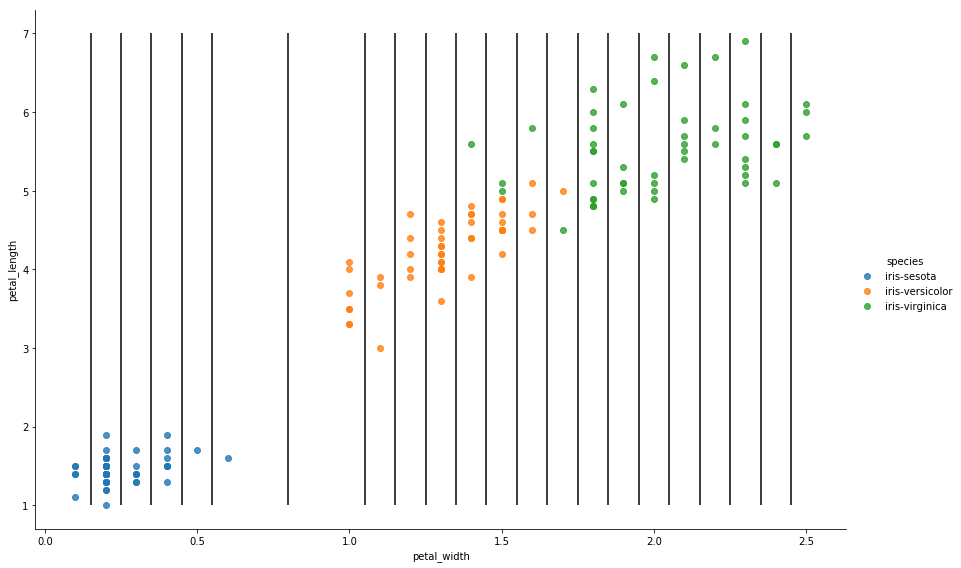

In [26]:
sns.lmplot(data = iris_df, x= "petal_width",y = "petal_length",fit_reg = False, height =8,
          aspect= 1.5,hue ="species")
plt.vlines(x = my_new_split[3], ymin = 1, ymax = 7 )
plt.show()

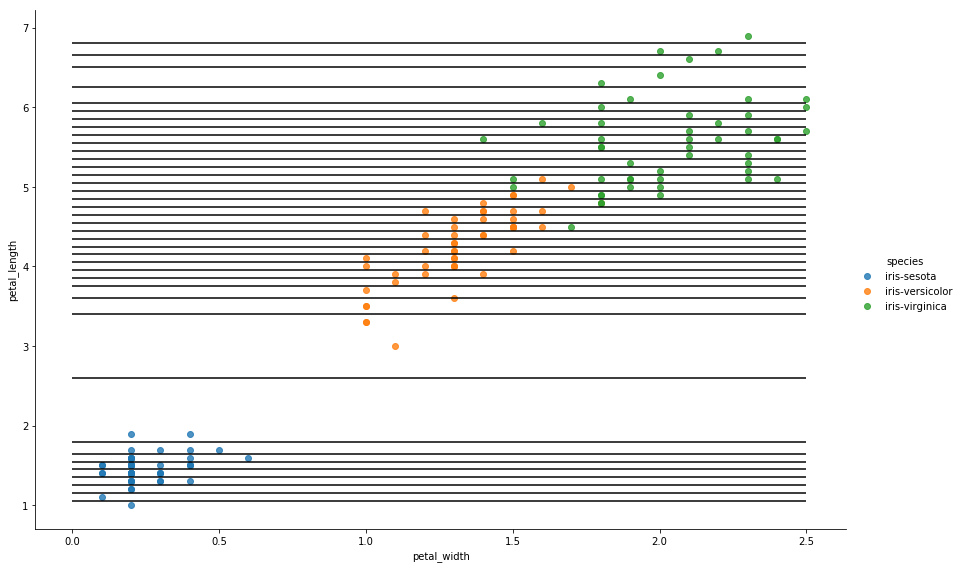

In [27]:
sns.lmplot(data = iris_df, x= "petal_width",y = "petal_length",fit_reg = False, height = 8,
          aspect= 1.5,hue ="species")
plt.hlines(y= my_new_split[2], xmin = 0, xmax = 2.5 )
plt.show()

## Split data

In [0]:
def split_my_data(my_data,split_column,split_values):
    
    split_column_values = my_data[:,split_column]
    data_below = my_data[split_column_values <= split_values]
    data_above = my_data[split_column_values > split_values]
    
    return data_below, data_above

In [0]:
split_column = 3
split_values = 0.8

In [0]:
data_below, data_above = split_my_data(my_data,split_column,split_values)

In [0]:
plot_df = pd.DataFrame(my_data, columns = iris_df.columns)

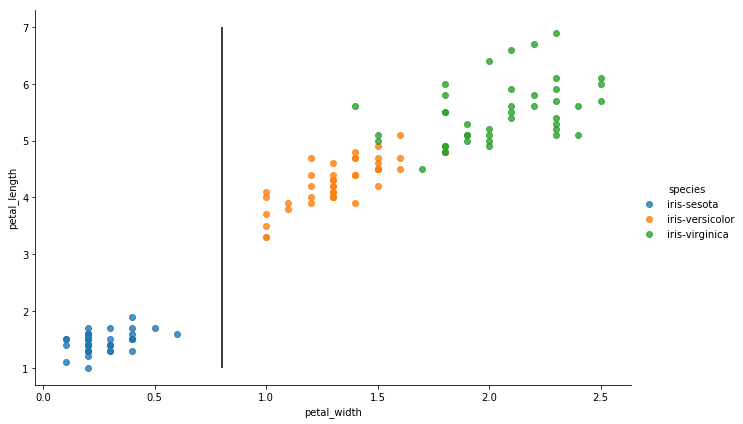

In [32]:
sns.lmplot(data = plot_df, x= "petal_width",y = "petal_length",
          fit_reg = False, height = 6, aspect = 1.5,hue ="species")
plt.vlines(x = split_values, ymin = 1, ymax = 7)
plt.show()

## Remaning class after data_below.

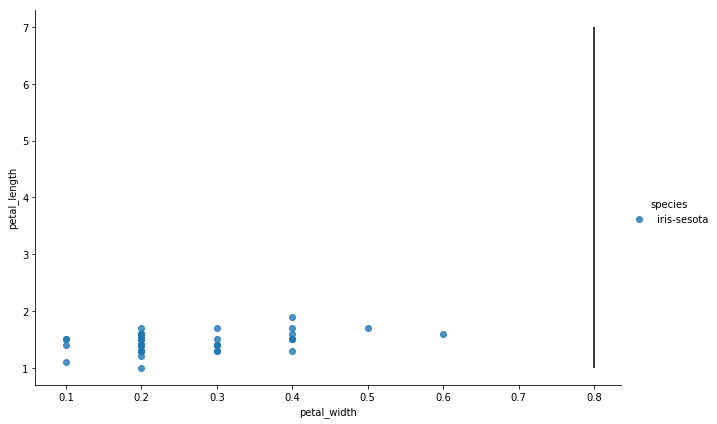

In [33]:
plot_df = pd.DataFrame(data_below, columns = iris_df.columns)
sns.lmplot(data = plot_df, x= "petal_width",y = "petal_length",
          fit_reg = False, height = 6, aspect = 1.5,hue ="species")
plt.vlines(x = split_values, ymin = 1, ymax = 7)
plt.show()

## Remaning class after data_above

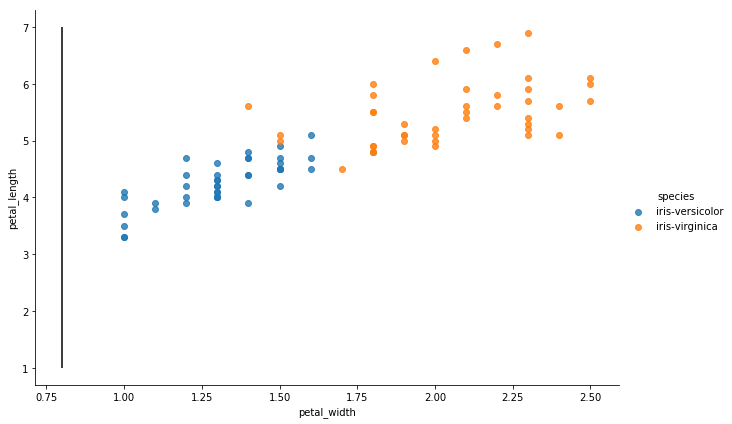

In [34]:
plot_df = pd.DataFrame(data_above, columns = iris_df.columns)
sns.lmplot(data = plot_df, x= "petal_width",y = "petal_length",
          fit_reg = False, height = 6, aspect = 1.5,hue ="species")
plt.vlines(x = split_values, ymin = 1, ymax = 7)
plt.show()

In [0]:
split_column = 3
split_values = 0.8

In [0]:
data_below, data_above = split_my_data(my_data,split_column,split_values)

## Entorpy

In [0]:
def calculate_entorpy(my_data):
    
    label_column = my_data[:,-1]
    false,count = np.unique(label_column, return_counts = True)
    probablities = count/count.sum()
    
    entropy = sum( probablities * -np.log2( probablities))
    return entropy

In [38]:
calculate_entorpy(my_data)

1.5836100169358511

## Full Entorpy

In [0]:
def full_entorpy(data_below,data_above):
    n_data_points = len(data_below) + len(data_above)
    p_data_below = len(data_below)/n_data_points
    p_data_above = len(data_above)/n_data_points
    total_entorpy = (p_data_below*calculate_entorpy(data_below))+(p_data_above*calculate_entorpy(data_above))
    return total_entorpy

In [40]:
full_entorpy(data_below,data_above)

0.6461538461538462

In [0]:
def determine_best_splits(my_data, potential_split):
    
    overall_entorpy = 999
    for column_index in potential_split:
        for value in potential_split[column_index]:
            data_below, data_above = split_my_data(my_data, split_column = column_index, split_values= value)
            current_overall_entropy = full_entorpy(data_below,data_above)
            
            if current_overall_entropy < overall_entorpy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_values = value
                
    return best_split_column,best_split_values


In [0]:
potential_split= get_new_split(my_data)

In [43]:
determine_best_splits(my_data, potential_split)

(3, 2.45)

## Decision Tree Algo

### Representation of the Decission Tree

In [0]:
example_tree = {"petal_width<=0.8": ["Iris-setosa",{"petal_width<= 1.65":
                                                   [{"petal_length<= 4.9":["Iris-versicolor","Iris-virginica"]},
                                                   "Iris-virginica"]}]}

#### sub_tree = {question : [yes_answer, no_answer]} 

In [0]:
def decision_tree_algorithm(iris_df,counter = 0,min_sample = 2):
    
    if counter == 0:
        global CULUMN_HEADERS
        CULUMN_HEADERS = iris_df.columns
        data = iris_df.values
    else:
        data = iris_df
    # base case
    
    if (check_class(data)) or (len(iris_df)<min_sample):
        classification = Classificaion(my_data)
        return classification
    #  recursion part
    
    else:
        counter += 1
        
        potential_split = get_new_split(data)
        
        split_column, split_value = determine_best_splits(data, potential_split)
        
        data_below, data_above = split_my_data(data, split_column,split_value)
        
        # sub-tree
        feature_name = CULUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name,split_value)
        
        sub_tree = {question:[]}
        
        # find answer (recuression)
        
        yes_answer = decision_tree_algorithm(data_below, counter)
        no_answer = decision_tree_algorithm(data_above, counter)
        
       
        
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree
        

In [0]:
tree = decision_tree_algorithm(train_df,min_sample = 3)

In [47]:
tree

{'petal_width <= 2.45': [{'petal_width <= 2.3499999999999996': [{'petal_width <= 2.25': [{'petal_width <= 2.1500000000000004': [{'petal_width <= 2.05': [{'petal_width <= 1.95': [{'petal_width <= 1.85': [{'petal_width <= 1.75': [{'petal_width <= 1.65': [{'petal_width <= 1.55': [{'petal_width <= 1.45': [{'petal_width <= 1.35': [{'petal_width <= 1.25': [{'petal_width <= 1.15': [{'petal_width <= 1.05': [{'petal_width <= 0.8': ['iris-sesota',
                                'iris-sesota']},
                              'iris-sesota']},
                            'iris-sesota']},
                          'iris-sesota']},
                        {'petal_length <= 5.199999999999999': ['iris-sesota',
                          'iris-sesota']}]},
                      {'petal_length <= 5.05': [{'petal_length <= 4.95': ['iris-sesota',
                          'iris-sesota']},
                        'iris-sesota']}]},
                    'iris-sesota']},
                  'iris-sesota']},
    

In [0]:
example = test_df.iloc[1]

In [49]:
example

sepal_length               7.3
sepal_width                2.9
petal_length               6.3
petal_width                1.8
species         iris-virginica
Name: 107, dtype: object

In [0]:
def classify_example(example,tree):
    question = list(tree.keys())[0]
    feature_name,comparision_operator , value = question.split()
    
    if example[feature_name] < float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]
    if not isinstance(answer,dict):
        return answer
    else:
        residual_tree = answer
        return classify_example(example,residual_tree)

In [51]:
 classify_example(example,tree)

'iris-sesota'

In [0]:
def calculate_acuracy(df,tree):
    df["classification"] = df.apply( classify_example,axis = 1, args=(tree,))
    df["classification_correct"] = df.classification == df.species
    accuracy = df.classification_correct.mean()
    return accuracy

In [53]:
calculate_acuracy(test_df,tree)

0.2

In [54]:
test_df

,sepal_length,sepal_width,petal_length,petal_width,species,classification,classification_correct
98,5.1,2.5,3.0,1.1,iris-versicolor,iris-sesota,False
107,7.3,2.9,6.3,1.8,iris-virginica,iris-sesota,False
10,5.4,3.7,1.5,0.2,iris-sesota,iris-sesota,True
66,5.6,3.0,4.5,1.5,iris-versicolor,iris-sesota,False
130,7.4,2.8,6.1,1.9,iris-virginica,iris-sesota,False
124,6.7,3.3,5.7,2.1,iris-virginica,iris-sesota,False
103,6.3,2.9,5.6,1.8,iris-virginica,iris-sesota,False
77,6.7,3.0,5.0,1.7,iris-versicolor,iris-sesota,False
122,7.7,2.8,6.7,2.0,iris-virginica,iris-sesota,False
91,6.1,3.0,4.6,1.4,iris-versicolor,iris-sesota,False
